Nama : Mufidah Nur Amaliah 

# Data Penjualan Properti NYC 

Kumpulan data berupa catatan setiap gedung atau unit bangunan (apartemen, dll.) yang terjual di pasar properti Kota New York selama periode 12 bulan. 
Dataset ini memuat lokasi, alamat, tipe, harga jual, dan tanggal penjualan unit bangunan yang terjual. 


## Import Pustaka

In [48]:
import numpy as np 
import pandas as pd
from matplotlib.pyplot import plot as plt 
from scipy.stats import norm

In [49]:
pd.set_option('display.max_columns', 22)
data = pd.read_csv("nyc-rolling-sales.csv")
data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
data.count()

Unnamed: 0                        84548
BOROUGH                           84548
NEIGHBORHOOD                      84548
BUILDING CLASS CATEGORY           84548
TAX CLASS AT PRESENT              84548
BLOCK                             84548
LOT                               84548
EASE-MENT                         84548
BUILDING CLASS AT PRESENT         84548
ADDRESS                           84548
APARTMENT NUMBER                  84548
ZIP CODE                          84548
RESIDENTIAL UNITS                 84548
COMMERCIAL UNITS                  84548
TOTAL UNITS                       84548
LAND SQUARE FEET                  84548
GROSS SQUARE FEET                 84548
YEAR BUILT                        84548
TAX CLASS AT TIME OF SALE         84548
BUILDING CLASS AT TIME OF SALE    84548
SALE PRICE                        84548
SALE DATE                         84548
dtype: int64

In [6]:
data.count().isnull()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [61]:
data.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [5]:
list(data['TOTAL UNITS'])

[5,
 31,
 17,
 10,
 6,
 20,
 8,
 46,
 15,
 24,
 34,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 24,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 47,
 0,
 132,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 5,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 1,
 7,
 10,
 4,
 24,
 4,
 24,
 9,
 9,
 9,
 4,
 9,
 9,
 16,
 8,
 9,
 16,
 9,
 8,
 7,
 211,
 211,
 211,
 211,
 32,
 0,
 0,
 0,
 

Menampilkan List Data Keseluruhan dari TOTAL UNITS, terlihat bahwa nilai minimalnya adalah 0 (nol) data tersebut belum di pre-processing.

In [7]:
data_new = data[data['TOTAL UNITS'] != 0]
data_new

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Melakukan Pre-processing dengan menghapus nilai 0 (nol) yang ada pada list data TOTAL UNITS

In [8]:
data_new['TOTAL UNITS']

0         5
1        31
2        17
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     7
84547     1
Name: TOTAL UNITS, Length: 64786, dtype: int64

In [9]:
list(data_new['TOTAL UNITS'])

[5,
 31,
 17,
 10,
 6,
 20,
 8,
 46,
 15,
 24,
 34,
 10,
 24,
 47,
 132,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 5,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 1,
 7,
 10,
 4,
 24,
 4,
 24,
 9,
 9,
 9,
 4,
 9,
 9,
 16,
 8,
 9,
 16,
 9,
 8,
 7,
 211,
 211,
 211,
 211,
 32,
 24,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


Menampilkan list data_new dari hasil TOTAL UNITS yang sudah di pre-pocessing, sehingga nilai 0 (nol) sudah di hapus untuk mempermudah dalam perhitungan. dan bisa dilihat bahwa nilai minimalnya yaitu 1 (satu).

# CRITERIA

### Apakah Data Total Unit Memenuhi Standar deviation?

## Mean

In [10]:
mean = data_new['TOTAL UNITS'].mean()
print("Mean :", mean)

Mean : 2.935263791559905


Menampilkan hasil nilai mean atau nilai rata-rata dari data TOTAL UNITS adalah 2.935263791559905

## Median

In [11]:
median = data_new['TOTAL UNITS'].median()
print("Median :", median)

Median : 1.0


Menampilkan hasil nilai median atau nilai tengah dari data TOTAL UNITS adalah 1.0

## Modus

In [12]:
modus = data_new['TOTAL UNITS'].mode()
print("Modus :", modus)

Modus : 0    1
Name: TOTAL UNITS, dtype: int64


In [ ]:
Menampilkan hasil nilai modus atau nilai yang sering muncul dari data TOTAL UNITS adalah 1 

## Range

In [13]:
def calculate_range(array):
    df_max = array.max()
    df_min = array.min()
    df_range = df_max - df_min
    return df_range

my_array = data_new['TOTAL UNITS']
result_range = calculate_range(my_array)
print("Range:", result_range)

Range: 2260


Menampilkan hasil nilai Range dari data TOTAL UNITS adalah 2260

## Variance

In [15]:
data_new['TOTAL UNITS'].var()

467.7468935145759

Menampilkan hasil nilai Variance dari ata TOTAL UNITS adalah 467.7468935145759

## Standart Deviation

Apakah data total unit memenuhi standar deviation?

In [17]:
data_ru = data_new['TOTAL UNITS']
data_ru.var()

467.7468935145759

In [18]:
mean = data_ru.mean()
print("Mean:", mean)

Mean: 2.935263791559905


In [24]:
standar_deviasi = np.std(data_ru)**(1/2)
print("Standar Deviasi:", standar_deviasi)

Standar Deviasi: 4.650515027464898


Dapat dilihat pada data Standar Deviation itu hasilnya tidak terdistribusi dengan normal, karena nilai Standar Deviation yaitu 4.650515027464898 jauh dari rata-rata dan Variansi-nya cukup besar yaitu 467.7468935145759



## Distribution

In [31]:
data_new = data_new[data_new['TOTAL UNITS'] < 50]

In [28]:
data_hist = data_new['TOTAL UNITS']

In [29]:
data_hist

0         5
1        31
2        17
3        10
4         6
         ..
84543     2
84544     2
84545     2
84546     7
84547     1
Name: TOTAL UNITS, Length: 64439, dtype: int64

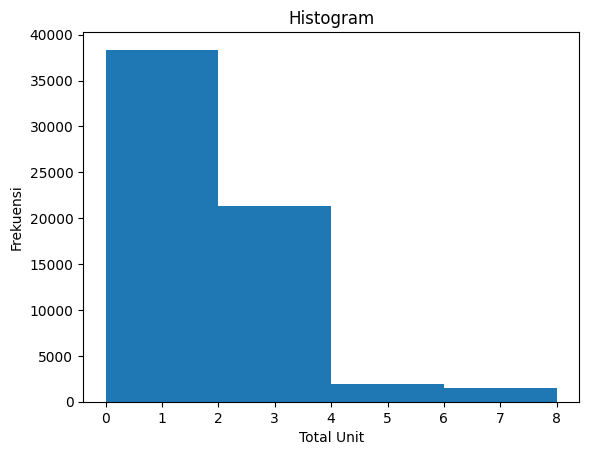

In [30]:
# create histogram
import matplotlib.pyplot as plt

plt.hist(data_hist,bins = [0,2,4,6,8])
plt.title("Histogram")
plt.xlabel('Total Unit')
plt.ylabel('Frekuensi')

# display histogram
plt.show()

### KESIMPULAN 

Dapat dilihat pada histogram bahwa hasil-nya tidak ter-Distribusi dengan normal

keterangan:
Ambang batas atas = 0,2,4,6,8
karena datanya mulai banyak dari nilai dibawah 8, 
maka bisa di lihat di histogram bahwa nilai total unit yang paling banyak itu ada pada total unit 0 sampai 2 sebesar 35.000-an, 
total unit 2 sampai 3 sebesar 20.000 dan total unit  4 sampai 8 frekuensinya ada di bawah 5000. 

Kenapa hanya mengambil 0,2,4,6,8 saja untuk ambang batasnya? 
karena nilai yang paling banyak itu ada dibawah angka 8, sedangkan nilai di atas 8 itu sangat minim.  
Jika di visualisasikan dengan data keseluruhan maka plotingannya / sebaran datanya tidak terlihat dengan jelas. 
Oleh karena itu hanya mengambil ambang batas 0,2,4,6,8 agar visualisasinya dapat terlihat dengan jelas. 